In [1]:
import numpy as np

import matplotlib.pyplot as plt

import healpy as hp

import pathlib

import os

#retina matplotlib magic



In [2]:
import sys
sys.path.append('../itfgs/')

version = 'bornVGiulio'
version = ''

from itfgs.params import S4n32 as SOB

In [3]:
from plancklens import utils
from os.path import join as opj

cls_path = opj(os.environ['HOME'], 'fgcmblensing', 'input', 'giulio')
cls_unl = utils.camb_clfile(opj(cls_path, 'lensedCMB_dmn1_lenspotentialCls.dat'))
cls_len = utils.camb_clfile(opj(cls_path, 'lensedCMB_dmn1_lensedCls.dat'))
cls_grad = SOB.camb_clfile_gradient(opj(cls_path, 'lensedCMB_dmn1_lensedgradCls.dat'))

ll = [cls_unl, cls_len, cls_grad]
for l in ll:
    for k, v in l.items():
        l[k] = np.nan_to_num(v)

In [4]:
cases = SOB.cases
get_info = SOB.get_info
get_all = SOB.get_all

In [5]:
Simulationsdir = pathlib.Path(os.environ['SCRATCH'])/'SKYSIMS/GIULIOSIMS/'

In [6]:
keyB = 'NL Born'
keyBg = 'NL Born Gauss'
keyBr = 'NL Born Rand'
keyBL = 'NL Born Lognormal'
keyBLr = 'NL Born Lognormal Rand'


In [7]:
cases

['', 'rand', 'gauss', 'randlog', 'log']

In [8]:
keys = [keyB, keyBr, keyBg]#, keyBLr, keyBL]

In [9]:
SOdict = {k: c for k, c in zip(cases, keys)}
SOdict

{'': 'NL Born', 'rand': 'NL Born Rand', 'gauss': 'NL Born Gauss'}

In [10]:
tt = cls_len['tt']
ee = cls_len['ee']
pp = cls_unl['pp']

In [11]:
def get_sim_len_lib(case):
    _, _, _, _, analysis_info, sims_cmb_len = get_all(case)
    return sims_cmb_len

def get_analysis_info(case):
    _, _, _, _, analysis_info, _ = get_all(case)
    return analysis_info

In [12]:
get_info(cases[0])

def gettemplensing(case):
    _, _, suffixLensing, _ = get_info(case)
    return opj(os.environ['SCRATCH'], 'n32', suffixLensing, 'lenscarfrecs')

In [13]:
class Config(object):
    def __init__(self, cls_unl, cls_len, cls_weight, nlev_t = 7., beam = 1.7, lmax_qlm = 4500, lminrec = 40, lmaxrec = 4000):

        self.nlev_t = nlev_t
        self.nlev_p = np.sqrt(2)*self.nlev_t
        self.beam = beam

        self.lmin_tlm = lminrec
        self.lmax_ivf = lmaxrec

        self.lmax_qlm = lmax_qlm

        self.cls_unl = cls_unl
        self.cls_len = cls_len
        self.cls_weight = cls_weight


qe_key = 'ptt'

analysis_info = get_analysis_info(cases[0])

nlev_t = analysis_info["nlev_t"]
nlev_p = nlev_t*np.sqrt(2)
beam = analysis_info["beam"]
cls_unl_fid = cls_unl
lmin_tlm, lmax_ivf = analysis_info["lmin_tlm"], analysis_info["lmax_ivf"]
lmax_qlm = analysis_info["lmax_qlm"]

SO = Config(cls_unl, cls_len, cls_grad, nlev_t = nlev_t, beam = beam, lmax_qlm = lmax_qlm, lminrec = lmin_tlm, lmaxrec = lmax_ivf)


Working on case  with suffix S4Giulio S4Giulio S4GiulioBorn


/home/users/d/darwish/.local/lib/python3.10/site-packages/plancklens/utils.py:124: RuntimeWarning: overflow encountered in cast
  return hashlib.sha1(np.copy(cl.astype(dtype), order='C')).hexdigest()


In [14]:
sim_len_libs = {c: get_sim_len_lib(c) for c in SOdict.keys()}

Working on case  with suffix S4Giulio S4Giulio S4GiulioBorn
Working on case rand with suffix S4GiulioBornRand S4Giulio S4GiulioBornRand
Working on case gauss with suffix S4GiulioBornGauss S4Giulio S4GiulioBornGauss


## Plot QE reconstruction

In [23]:
key = qe_key

In [24]:
Nsims = 16
simset = range(Nsims)

In [25]:
from plancklens.qcinv.util_alm import alm_copy as palm_copy

In [29]:
input_plm_maps = {k: [sims_cmb_len.get_sim_plm(i) for i in simset] for k, sims_cmb_len in sim_len_libs.items()}

Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim


In [30]:
temps = {c: gettemplensing(c) for c in cases}

In [31]:
list(SOdict.keys())

['', 'rand', 'gauss']

In [32]:
from lenscarf.iterators import statics

plms_QE_dict = {c: [np.load(f'{temps[c]}/{key}_sim{i:04}{version}/normalized_phi_plm_it000.npy') for i in simset] for c in SOdict.keys()}

p2k = np.arange(4001) * np.arange(1, 4002) * 0.5

In [33]:
from healpy import Alm

def palm_copy(alm, lmax=None):
    """Copies the alm array, with the option to reduce its lmax.

    """
    if hasattr(alm, 'alm_copy'):
        return alm.alm_copy(lmax=lmax)

    lmox = Alm.getlmax(len(alm))
    assert (lmax <= lmox)

    if (lmox == lmax) or (lmax is None):
        ret = np.copy(alm)
    else:
        ret = np.zeros(Alm.getsize(lmax), dtype=np.complex128)
        for m in range(0, lmax + 1):
            ret[((m * (2 * lmax + 1 - m) // 2) + m):(m * (2 * lmax + 1 - m) // 2 + lmax + 1)] = \
            alm[((m * (2 * lmox + 1 - m) // 2) + m):(m * (2 * lmox + 1 - m) // 2 + lmax + 1)]
    return ret

plm_in_ins = {k: [palm_copy(d_, lmax = lmax_qlm) for d_ in d] for k, d in input_plm_maps.items()} #GF input postborn + NL map
auto_in = {k: [hp.alm2cl(p) for p in plm_in] for k, plm_in in plm_in_ins.items()}

In [34]:
crosses_dict =  {k: [hp.alm2cl(r, p) for r, p in zip(plms_QE_dict[k], plm_in)] for k, plm_in in plm_in_ins.items()}

In [35]:
mean = lambda x: np.mean(x, axis = 0)

/tmp/ipykernel_171300/3667975814.py:6: RuntimeWarning: invalid value encountered in divide
  plt.loglog(mean(auto_in[key_])/mean(auto_in[cases[0]]), label = f'Auto IN {SOdict[key_]}/Auto IN {SOdict[cases[0]]}', alpha = alpha, ls = ls)


Text(0, 0.5, '$r_L$')

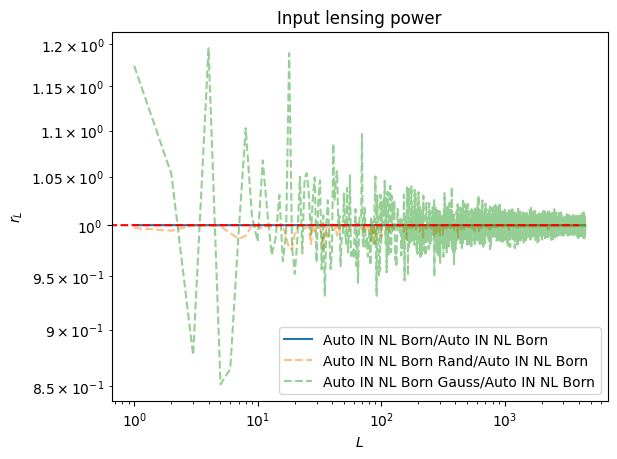

In [36]:
plt.title('Input lensing power')

for key_ in SOdict.keys():
    alpha = 0.5 if key_ != cases[0] else 1.
    ls = '--' if key_ != cases[0] else '-'
    plt.loglog(mean(auto_in[key_])/mean(auto_in[cases[0]]), label = f'Auto IN {SOdict[key_]}/Auto IN {SOdict[cases[0]]}', alpha = alpha, ls = ls)

#plt.loglog(auto_in[keyB]/auto_in[keyPB], label = f'Auto IN {keyB}/Auto IN {keyPB}')
#plt.loglog(auto_in[keyBr]/auto_in[keyPB], label = f'Auto IN {keyBr}/Auto IN {keyPB}', ls = '--')

plt.loglog(np.arange(0, 4000), np.ones(4000), 'r--')

#for k, auto in auto_in.items():
#    plt.loglog(mean(auto)/pp[:len(mean(auto))], label = f'Auto IN {k}/pp th', alpha = 0.4, ls = '--')


plt.legend()

plt.xlabel(r'$L$')
plt.ylabel(r'$r_L$')

/tmp/ipykernel_171300/513606381.py:5: RuntimeWarning: invalid value encountered in divide
  plt.loglog(mean(autoin)/mean(crosses_dict[k]), label = f'Auto IN/CROSS IN {k}')


Text(0, 0.5, '$C_L$')

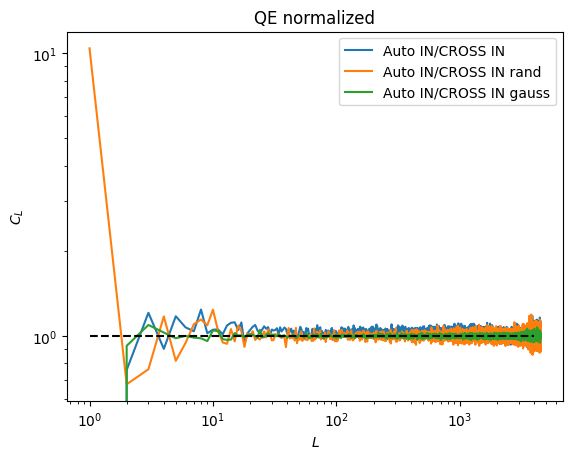

In [37]:
plt.title('QE normalized')

for k, autoin in auto_in.items():
    #plt.loglog(mean(crosses_dict[k]), label = f'Cross {k}')
    plt.loglog(mean(autoin)/mean(crosses_dict[k]), label = f'Auto IN/CROSS IN {k}')
plt.hlines(1, 1, 4000, ls = '--', color = 'black')
plt.legend()

plt.xlabel(r'$L$')
plt.ylabel(r'$C_L$')

In [38]:
auto =  {k: [hp.alm2cl(p, p) for p in plms] for k, plms in plms_QE_dict.items()}

In [39]:
rhos = {k: mean(cross)/np.sqrt(mean(auto[k])*mean(auto_in[k])) for k, cross in crosses_dict.items()}


/tmp/ipykernel_171300/141568823.py:1: RuntimeWarning: invalid value encountered in divide
  rhos = {k: mean(cross)/np.sqrt(mean(auto[k])*mean(auto_in[k])) for k, cross in crosses_dict.items()}


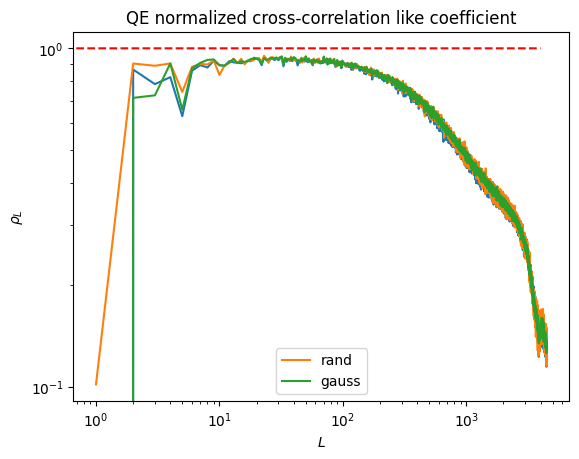

In [40]:
plt.title('QE normalized cross-correlation like coefficient')

for k, rho in rhos.items():
    plt.loglog(rho, label = f'{k}')

plt.loglog(np.arange(0, 4000), np.ones(4000), 'r--')

plt.xlabel(r'$L$')
plt.ylabel(r'$\rho_L$')

plt.legend()

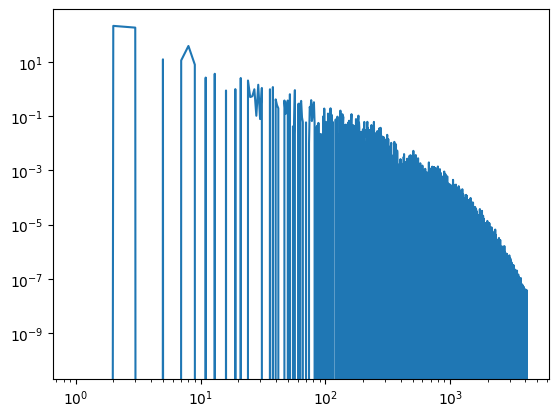

In [41]:
aa = hp.read_alm("/home/users/d/darwish/scratch/n32/S4Giulio/cmbs/sim_0002_tlm.fits")
bb = hp.read_alm("/home/users/d/darwish/scratch/n32/S4GiulioBornRand/cmbs/sim_0003_tlm.fits")
plt.loglog(hp.alm2cl(aa, bb))

## Iterative Reconstruction

In [42]:
from lenscarf.iterators import statics

In [43]:
iters = [0, 1, 2]

In [44]:
plms_dict = {c: [statics.rec.load_plms(f'{temps[c]}/{key}_sim{i:04}{version}/', iters) for i in simset] for c in SOdict.keys()}

In [45]:
rho_iters_dict = {}
crosses_dict = {}
autos_dict = {}
autos_in_dict = {}

for k, plms in plms_dict.items(): 
    #plms list over simulation indices
    auto_in_temp = auto_in[k] #one for each simulation index
    cs_ = np.array([[hp.alm2cl(p_, pin) for p_ in plm_] for plm_, pin in zip(plms, plm_in_ins[k])])
    as_ = np.array([[hp.alm2cl(p_) for p_ in plm_] for plm_ in plms])
    
    crosses_dict[k] = cs_
    autos_dict[k] = as_
    autos_in_dict[k] = auto_in_temp
    
    rhos_list = mean(cs_)/np.sqrt(mean(as_)*mean(auto_in_temp))
    rho_iters_dict[k] = rhos_list

/tmp/ipykernel_171300/153119631.py:16: RuntimeWarning: invalid value encountered in divide
  rhos_list = mean(cs_)/np.sqrt(mean(as_)*mean(auto_in_temp))


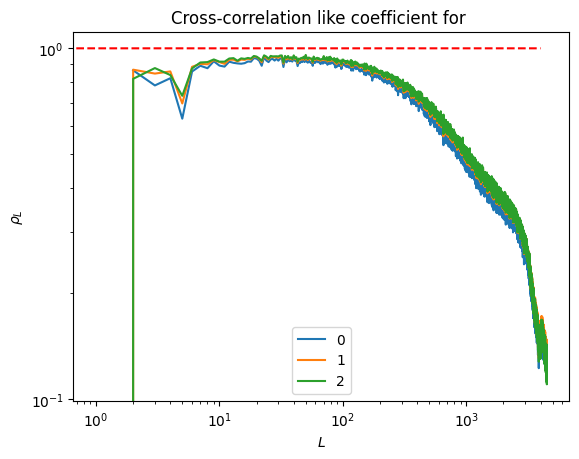

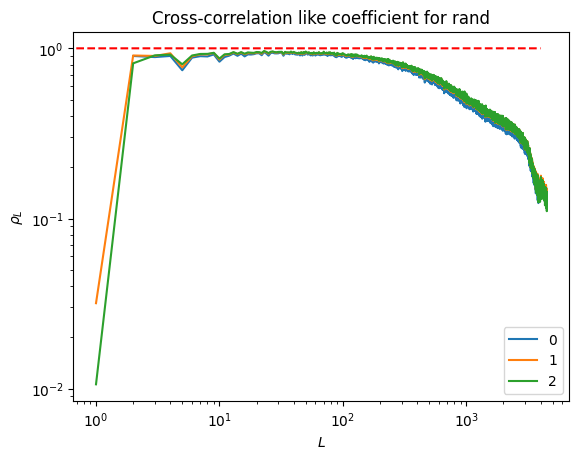

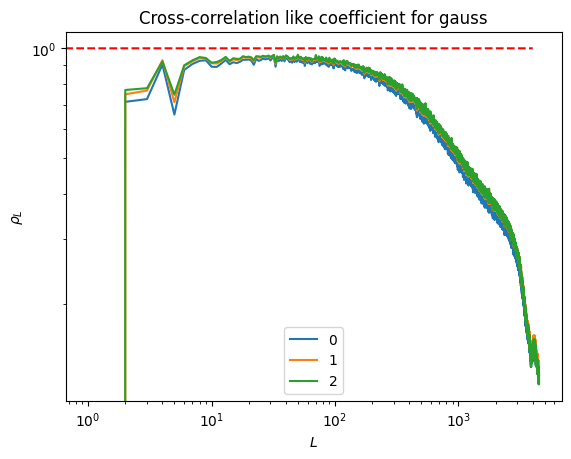

In [46]:

colors = []
for k, rhos in rho_iters_dict.items():
    plt.title(f'Cross-correlation like coefficient for {k}')
    [plt.loglog(rho, label = f'{i}') for i, rho in enumerate(rhos)]
    plt.xlabel(r'$L$')
    plt.ylabel(r'$\rho_L$')
    plt.legend()
    plt.loglog(np.arange(0, 4000), np.ones(4000), 'r--')
    plt.show()

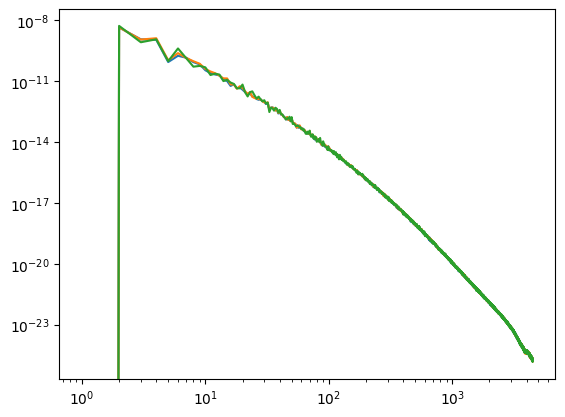

In [47]:
for k, c in crosses_dict.items():
    plt.loglog(mean(np.nan_to_num(c)[0]))

## Check Normalization

### N0 contribution

In [62]:
from plancklens import n0s
#checking theory dependence on noise and beam
n0iter = n0s.get_N0_iter(qe_key = qe_key, nlev_t = nlev_t, nlev_p = nlev_p, beam_fwhm = beam, 
                    cls_unl_fid = cls_unl_fid, lmin_cmb = lmin_tlm, lmax_cmb = lmax_ivf, itermax = max(iters), lmax_qlm = lmax_qlm, ret_delcls = True)

OSError: libifport.so.5: cannot open shared object file: No such file or directory

In [ ]:
N0sb, N0sunb, Resp, cls_plen, cls_plen_true, _  = n0iter

In [ ]:
from plancklens import qresp
from lenscarf.utils_hp import gauss_beam
from lenscarf.utils import cli


transf_tlm   =  gauss_beam(SO.beam/180 / 60 * np.pi, lmax=SO.lmax_ivf) * (np.arange(SO.lmax_ivf + 1) >= lmin_cmb)
ftl =  cli(cls_len['tt'][:SO.lmax_ivf + 1] + (nlev_t / 180 / 60 * np.pi) ** 2 * cli(transf_tlm ** 2)) * (transf_tlm > 0)

ftlu =  cli(cls_unl['tt'][:SO.lmax_ivf + 1] + (nlev_t / 180 / 60 * np.pi) ** 2 * cli(transf_tlm ** 2)) * (transf_tlm > 0)

R = qresp.get_response('ptt', lmax_cmb, 'p', SO.cls_len, SO.cls_weight, {'e': ftl*0., 'b': ftl*0., 't': ftl}, lmax_qlm=SO.lmax_qlm)[0]

In [ ]:
clppfid = cls_unl['pp'][0:len(mean(auto_in_temp))]

/tmp/ipykernel_197214/3565291942.py:5: RuntimeWarning: divide by zero encountered in divide
  n0calculated = 1/R if itr == 0 else n0calculated


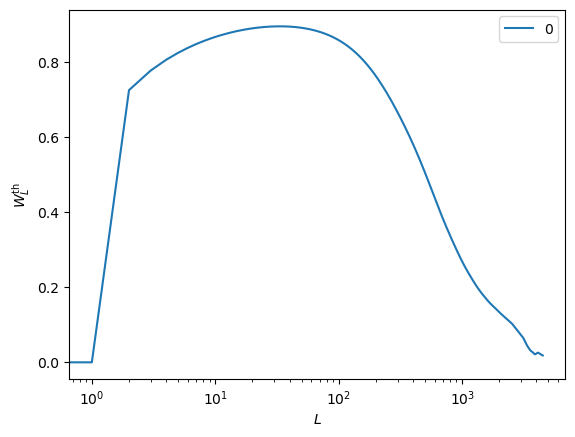

In [ ]:
p = None
wfs_th = {}
for itr in iters:
    n0calculated = n0iter[0][itr]
    n0calculated = 1/R if itr == 0 else n0calculated
    #n1calculated = n0iter[0][0]**2.*n1_tt if itr == 0 else 0
    n1calculated = 0
    WL = clppfid/(clppfid+n0calculated+n1calculated)
    #color = None if p is None else p[0].get_color()
    p = plt.plot(WL, label = f'{itr}')
    wfs_th[itr] = WL
plt.xlabel(r'$L$')
plt.ylabel(r'$W^{\rm{th}}_L$')
plt.xscale('log')
plt.legend(loc = 'best')

In [107]:
from plancklens.n1 import n1 as n1s

In [108]:
N0s, N0s_unbiased, Response, delcls_fid, delcls_true, fals = n0iter

In [33]:
lib_dir = '/pscratch/sd/o/omard/n1TTiterativeGiulioS4Paper'

n1_tts_dict = {}

n1_tts = []
n1_tts_extra = []
itermax = max(iters)+1
key = 'ptt'

for i in range(itermax):
    lib_dir_ = lib_dir+f"{i}"
    n1lib = n1s.library_n1(lib_dir_, delcls_fid[i]['tt'], delcls_fid[i]['te'], delcls_fid[i]['ee'], SO.lmax_qlm,  dL = 10, lps = None)
    ftl = fals[i]['tt']
    fel = fals[i]['tt']
    fbl = fals[i]['tt']
    #ppres = 1/(1/Response[i]+1/pp)
    n1_tt, n1_tt_extra = n1lib.get_n1(key, 'p', delcls_fid[i]['pp'], ftl, fel, fbl, SO.lmax_qlm)
    n1_tts += [n1_tt]



In [109]:
n1_tts = [0, 0]

In [110]:
Lmax = SO.lmax_qlm
Ls = np.arange(1, Lmax + 1)

/tmp/ipykernel_197214/2122714285.py:5: RuntimeWarning: divide by zero encountered in divide
  n0calculated = 1/R if itr == 0 else n0calculated
/tmp/ipykernel_197214/2122714285.py:8: RuntimeWarning: divide by zero encountered in divide
  n1calculated = 1/Response[itr]**2.*n1_tts[itr]
/tmp/ipykernel_197214/2122714285.py:8: RuntimeWarning: invalid value encountered in multiply
  n1calculated = 1/Response[itr]**2.*n1_tts[itr]


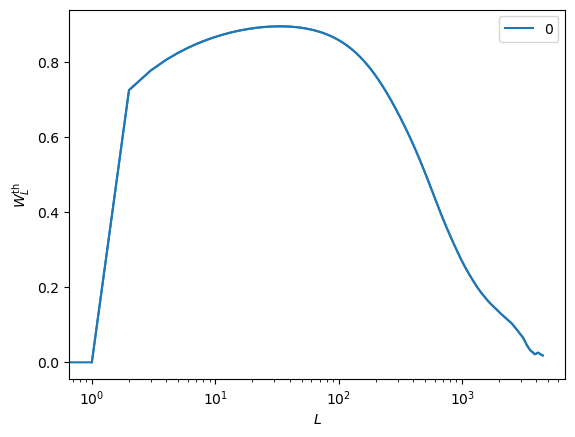

In [111]:
p = None
wfs_th = {}
for itr in iters:
    n0calculated = n0iter[0][itr]
    n0calculated = 1/R if itr == 0 else n0calculated
    
    #n1calculated = 1/Response[itr]**2.*n1_tts[iters.index(itr)]
    n1calculated = 1/Response[itr]**2.*n1_tts[itr]

    WL = clppfid/(clppfid+n0calculated+n1calculated)

    WL2 = clppfid/(clppfid+n0calculated)

    #color = None if p is None else p[0].get_color()
    p = plt.plot(WL, label = f'{itr}')
    plt.plot(WL2, color = p[0].get_color())
    wfs_th[itr] = WL
plt.xlabel(r'$L$')
plt.ylabel(r'$W^{\rm{th}}_L$')
plt.xscale('log')
plt.legend(loc = 'best')

/tmp/ipykernel_205162/2867874994.py:5: RuntimeWarning: divide by zero encountered in divide
  n0calculated = 1/R if itr == 0 else n0calculated
/tmp/ipykernel_205162/2867874994.py:8: RuntimeWarning: divide by zero encountered in divide
  n1calculated = 1/Response[itr]**2.*n1_tts[itr]
/tmp/ipykernel_205162/2867874994.py:8: RuntimeWarning: invalid value encountered in multiply
  n1calculated = 1/Response[itr]**2.*n1_tts[itr]
/tmp/ipykernel_205162/2867874994.py:15: RuntimeWarning: invalid value encountered in divide
  plt.plot(WL2/WL-1, label = f'{itr}')
/tmp/ipykernel_205162/2867874994.py:12: RuntimeWarning: invalid value encountered in divide
  WL2 = clppfid/(clppfid+n0calculated)


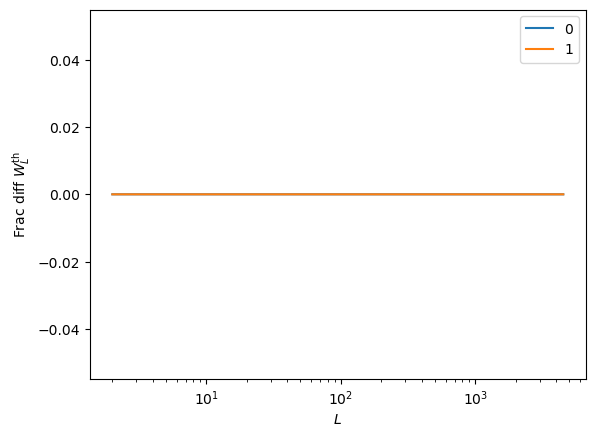

In [43]:
p = None
wfs_th = {}
for itr in iters:
    n0calculated = n0iter[0][itr]
    n0calculated = 1/R if itr == 0 else n0calculated
    
    #n1calculated = 1/Response[itr]**2.*n1_tts[iters.index(itr)]
    n1calculated = 1/Response[itr]**2.*n1_tts[itr]

    WL = clppfid/(clppfid+n0calculated+n1calculated)

    WL2 = clppfid/(clppfid+n0calculated)

    #color = None if p is None else p[0].get_color()
    plt.plot(WL2/WL-1, label = f'{itr}')
    wfs_th[itr] = WL
plt.xlabel(r'$L$')
plt.ylabel(r'Frac diff $W^{\rm{th}}_L$')
plt.xscale('log')
plt.legend(loc = 'best')

In [112]:
n1calculated = n0iter[0][0]**2.*n1_tts[iters.index(itr)]

## Getting sims based normalization from Gaussian simulations

In [48]:
sim_len_libs

{'': <itfgs.params.S4n32.SehgalSim at 0x2b6a7377fdc0>,
 'rand': <itfgs.params.S4n32.SehgalSim at 0x2b6a7377e8c0>,
 'gauss': <itfgs.params.S4n32.SehgalSim at 0x2b6a7377e110>}

In [64]:
input_plm_maps_born_gaussian = {k: sim_len_libs[SOB.casogauss].get_sim_plm(k) for k in simset}

Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim
Reading saved CMB lensing potential sim


In [76]:
plm_in_ins_born_gaussian = input_plm_maps_born_gaussian #{k: palm_copy(d, lmax = lmax_qlm) for k, d in input_plm_maps_born_gaussian.items()} #GF input postborn + NL map

auto_in_born_gaussian = np.array([hp.alm2cl(palm_copy(plm_in, lmax = lmax_qlm)) for plm_in in plm_in_ins_born_gaussian.values()])

In [73]:
crosses_born_gaussian = np.array([[hp.alm2cl(palm_copy(plm_in, lmax = lmax_qlm), plm_rec) for plm_rec in statics.rec.load_plms(f'{gettemplensing(SOB.casogauss)}/{key}_sim{k:04}{version}', iters)] for k, plm_in in plm_in_ins_born_gaussian.items()])


/tmp/ipykernel_171300/4083962587.py:4: RuntimeWarning: invalid value encountered in divide
  norms_gauss_born_gaussian = np.nanmean(np.swapaxes(crosses_born_gaussian, 0, 1)/auto_in_born_gaussian, axis = 1)
/tmp/ipykernel_171300/4083962587.py:4: RuntimeWarning: Mean of empty slice
  norms_gauss_born_gaussian = np.nanmean(np.swapaxes(crosses_born_gaussian, 0, 1)/auto_in_born_gaussian, axis = 1)


Text(0.5, 1.0, 'Empirical sims normalization for Gaussian simulations from kappa Born power')

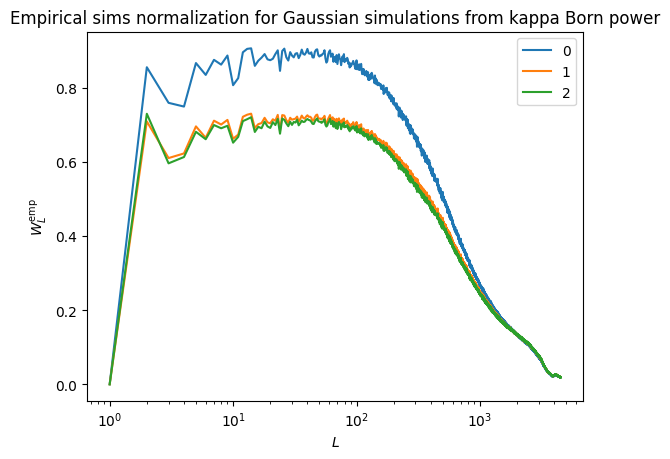

In [82]:
norms_gauss_born_gaussian = {}

#always assume in this notebook that you have all iterations from 0 to itmax in iters
norms_gauss_born_gaussian = np.nanmean(np.swapaxes(crosses_born_gaussian, 0, 1)/auto_in_born_gaussian, axis = 1)
for itr in iters:
 plt.plot(norms_gauss_born_gaussian[itr], label = itr)
plt.legend()
plt.xscale('log')
plt.ylabel(r'$W_L^{\rm{emp}}$')
plt.xlabel('$L$')
plt.title('Empirical sims normalization for Gaussian simulations from kappa Born power')

/tmp/ipykernel_171300/3871334674.py:5: RuntimeWarning: invalid value encountered in divide
  somma = np.nanmean([crosses_born_gaussian[i][itr]/auto_in_born_gaussian[i] for i in simset], axis = 0)
/tmp/ipykernel_171300/3871334674.py:5: RuntimeWarning: Mean of empty slice
  somma = np.nanmean([crosses_born_gaussian[i][itr]/auto_in_born_gaussian[i] for i in simset], axis = 0)


NameError: name 'wfs_th' is not defined

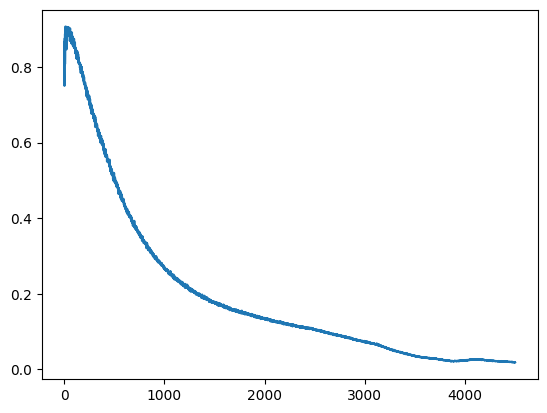

In [52]:
norms_gauss_born_gaussian = {}

#always assume in this notebook that you have all iterations from 0 to itmax in iters
for itr in iters:
    somma = np.nanmean([crosses_born_gaussian[i][itr]/auto_in_born_gaussian[i] for i in simset], axis = 0)
    somma[:2] = np.nan
    norms_gauss_born_gaussian[itr] = somma
    p = plt.plot(somma, label = itr)
    plt.plot(wfs_th[itr], ls = '--', color = p[0].get_color())
plt.legend()
plt.xscale('log')
plt.ylabel(r'$W_L$')
plt.xlabel('$L$')
plt.title('Comparing empirical sims normalization for Gaussian simulations from kappa Born power and theoretical expected one')

## Correcting with empirical Gaussian kappa power Born derived normalization

In [87]:
autos_in_dict.keys()

dict_keys(['', 'rand', 'gauss'])

/tmp/ipykernel_171300/435351773.py:6: RuntimeWarning: invalid value encountered in divide
  plt.plot(cross_element/norms_gauss_born_gaussian[it]/autoin_, label = it)


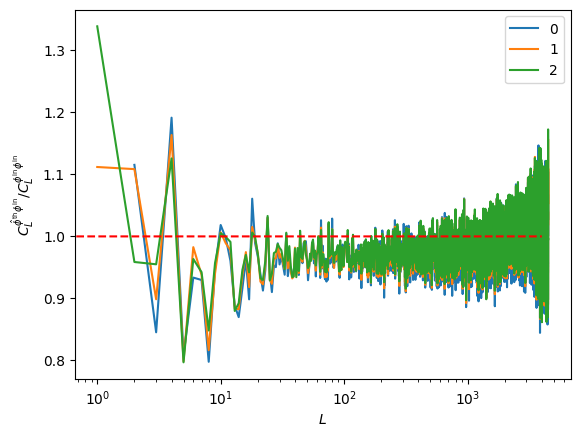

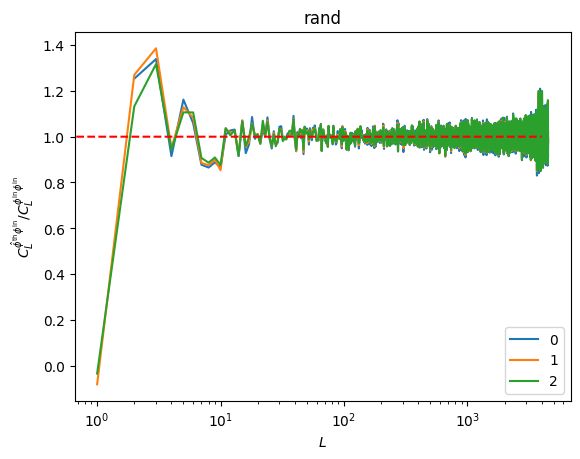

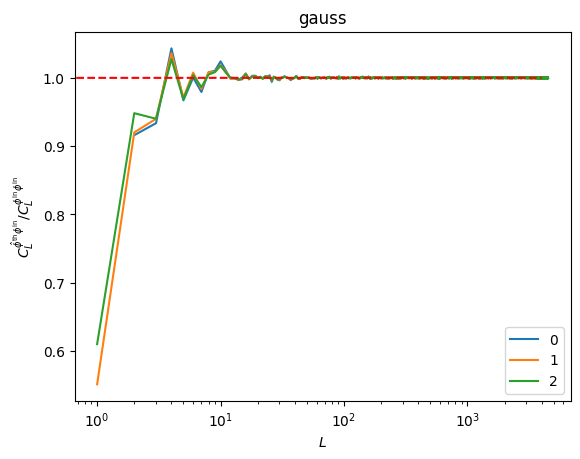

In [88]:
for k, cross_ in crosses_dict.items():
    autoin_ = mean(autos_in_dict[k])
    plt.title(f"{k}")
    cross = mean(cross_)
    for it, cross_element in enumerate(cross):
        plt.plot(cross_element/norms_gauss_born_gaussian[it]/autoin_, label = it)
    plt.plot(np.arange(0, 4000), np.ones(4000), 'r--')
    plt.xlabel(r'$L$')
    plt.ylabel(r'$C^{\hat{\phi}^{\rm{th}}\phi^{\rm{in}}}_L/C^{\phi^{\rm{in}}\phi^{\rm{in}}}_L$')
    plt.xscale('log')
    plt.legend()
    plt.show()

In [89]:
from scipy import signal
import scipy

def bin_theory(l, lcl, bin_edges):
    sums = scipy.stats.binned_statistic(l, l, statistic = 'sum', bins = bin_edges)
    cl = scipy.stats.binned_statistic(l, lcl, statistic = 'sum', bins = bin_edges)
    cl = cl[0]/sums[0]
    return cl

bin_edges = np.arange(10, 4000, 140)

In [90]:
std = lambda x: np.std(x, axis = 0)

In [91]:
autos_in_dict.keys()

dict_keys(['', 'rand', 'gauss'])

In [92]:
cases

['', 'rand', 'gauss', 'randlog', 'log']

/tmp/ipykernel_171300/1889871817.py:20: RuntimeWarning: invalid value encountered in divide
  value = process((A-B)/norms_gauss_born_gaussian[it]/autoin_)


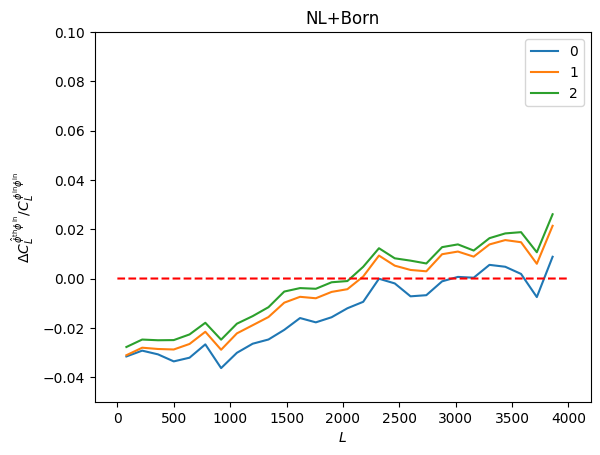

In [94]:

#plt.figure(figsize = (3, 6))
autoin_ = mean(autos_in_dict[cases[0]])
plt.title(f"NL+Born")

cross_A = mean(crosses_dict[SOB.casostd])
cross_B = mean(crosses_dict[SOB.casorand])

std_A_B = std(crosses_dict[SOB.casostd]-crosses_dict[SOB.casorand])

for it, cross_elements in enumerate(zip(cross_A, cross_B)):
    A, B = cross_elements
    ls_ = np.arange(0, len(A))
    elbin = ls_
    process = lambda x: signal.savgol_filter(x, 53, # window size used for filtering
                           3) 
    #process = lambda x: x
    process = lambda x: bin_theory(ls_, ls_*x, bin_edges)
    elbin = (bin_edges[:-1]+bin_edges[1:])/2
    
    value = process((A-B)/norms_gauss_born_gaussian[it]/autoin_) 
    #plt.fill_between(elbin, value-svalue/np.sqrt(Nsims), value+svalue/np.sqrt(Nsims), alpha = 0.4)
    plt.plot(elbin, value, label = it)
    
plt.plot(np.arange(0, 4000), np.zeros(4000), 'r--')
plt.xlabel(r'$L$')
plt.ylabel(r'$\Delta C^{\hat{\phi}^{\rm{th}}\phi^{\rm{in}}}_L/C^{\phi^{\rm{in}}\phi^{\rm{in}}}_L$')
#plt.xscale('log')
plt.ylim(-0.05, 0.1)
plt.legend()
plt.show()

/tmp/ipykernel_171300/2509121292.py:19: RuntimeWarning: invalid value encountered in divide
  value = process((A-B)/norms_gauss_born_gaussian[it]**2/autoin_)
/tmp/ipykernel_171300/2509121292.py:20: RuntimeWarning: invalid value encountered in divide
  svalue = process((sA_B)/norms_gauss_born_gaussian[it]**2/autoin_)


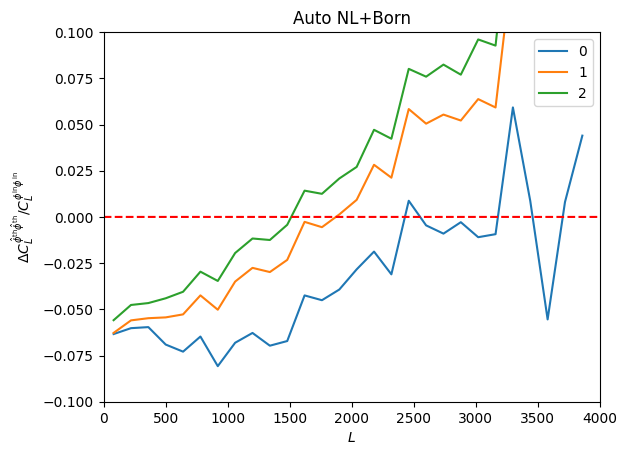

In [95]:
autoin_ = mean(autos_in_dict[SOB.casostd])
plt.title(f"Auto NL+Born")

cross_A = mean(autos_dict[SOB.casostd])
cross_B = mean(autos_dict[SOB.casorand])

std_A_B = std(autos_dict[SOB.casostd]-autos_dict[SOB.casorand])

for it, cross_elements in enumerate(zip(cross_A, cross_B, std_A_B)):
    A, B, sA_B = cross_elements
    ls_ = np.arange(0, len(A))
    elbin = ls_
    process = lambda x: signal.savgol_filter(x, 53, # window size used for filtering
                           3) 
    process = lambda x: x
    process = lambda x: bin_theory(ls_, ls_*x, bin_edges)
    elbin = (bin_edges[:-1]+bin_edges[1:])/2
    
    value = process((A-B)/norms_gauss_born_gaussian[it]**2/autoin_) 
    svalue = process((sA_B)/norms_gauss_born_gaussian[it]**2/autoin_)
    #plt.fill_between(elbin, value-svalue/np.sqrt(Nsims), value+svalue/np.sqrt(Nsims), alpha = 0.4)
    plt.plot(elbin, value, label = it)
    
plt.plot(np.arange(0, 4000), np.zeros(4000), 'r--')
plt.xlabel(r'$L$')
plt.ylabel(r'$\Delta C^{\hat{\phi}^{\rm{th}}\hat{\phi}^{\rm{th}}}_L/C^{\phi^{\rm{in}}\phi^{\rm{in}}}_L$')
#plt.xscale('log')
plt.ylim(-0.1, 0.1)
plt.xlim(0, 4000)

plt.legend()
plt.show()